In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU

def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

def createModel(layers, activation, input_dim) :    
    model = Sequential()        
    d = layers.pop(0)
    model.add(Dense(d, activation=activation,input_dim =input_dim))
    for l in layers :
        model.add(Dense(l, activation=activation))
    model.add(Dense(1, activation='sigmoid'))    
    return model

## XOR 학습시키기

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [4]:
model = Sequential()

model.add(Dense(10, input_dim=2)) #hidden layer
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(1)) #출력층
model.add(Activation('sigmoid'))

model.summary()

# (w1, w1, b1)X3 + (b1*5 + b2) = 15 + 6 =21

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_______________________________________

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [8]:
# batchsize : 사용할 트레이닝 데이터 수, epochs : 반복횟수
# Total number of training examples present in a single batch.
# https://m.blog.naver.com/PostView.nhn?blogId=qbxlvnf11&logNo=221449297033&proxyReferer=https%3A%2F%2Fwww.google.com%2F

model.fit(X,y,batch_size=4, epochs=3000, verbose=0)
print(model.predict(X))

[[2.7143862e-04]
 [9.9982017e-01]
 [9.9986184e-01]
 [3.5249573e-04]]


In [9]:
p=model.predict(X)
print((p>0.5)*1)

[[0]
 [1]
 [1]
 [0]]


## 그래프 그리기

In [10]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(),yy.flatten()]

<img src='numpy c_.jpg' width=500>

<class 'numpy.ndarray'>
(2500, 1)


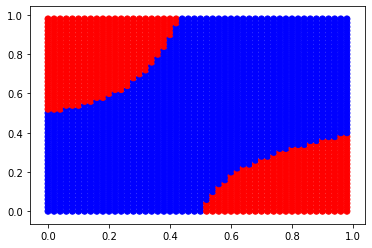

In [11]:
h = model.predict(grid)

print(type(h))
print(h.shape)

colors = ['red' if i > 0.5 else 'blue' for i in h]

plt.scatter(xx.flatten(), yy.flatten(), color=colors)

## make_moons로 테스트해보기
->층이 많아질 경우, sigmoid로는 정확도에 한계가 있음.

(500, 2)
(500,)


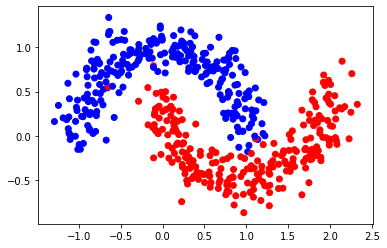

In [13]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.15)

print(x_data.shape)
print(y_data.shape)

colors = ['red' if i == 1 else 'blue' for i in y_data]

plt.scatter(x_data[:,0], x_data[:,1], color=colors, alpha=1.0)

In [21]:
model2 = Sequential([
    Dense(10, activation='sigmoid',input_dim=2),   
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

# model2.summary()

In [22]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.fit(x_data, y_data, batch_size=100, 
           epochs=1000, verbose=0, 
           validation_data=(x_data,y_data),
           callbacks=[printepoch(100)])

0 => {'val_loss': 0.7082623958587646, 'val_accuracy': 0.5, 'loss': 0.7110918879508972, 'accuracy': 0.5}
100 => {'val_loss': 0.3773586809635162, 'val_accuracy': 0.8379999995231628, 'loss': 0.37939918637275694, 'accuracy': 0.838}
200 => {'val_loss': 0.31099624633789064, 'val_accuracy': 0.8539999723434448, 'loss': 0.3113470792770386, 'accuracy': 0.854}
300 => {'val_loss': 0.30100064873695376, 'val_accuracy': 0.8619999885559082, 'loss': 0.30112460255622864, 'accuracy': 0.862}
400 => {'val_loss': 0.28745393455028534, 'val_accuracy': 0.8619999885559082, 'loss': 0.2876776188611984, 'accuracy': 0.86}
500 => {'val_loss': 0.25148914456367494, 'val_accuracy': 0.8980000019073486, 'loss': 0.252092120051384, 'accuracy': 0.898}
600 => {'val_loss': 0.15360952764749528, 'val_accuracy': 0.949999988079071, 'loss': 0.15446819365024567, 'accuracy': 0.948}
700 => {'val_loss': 0.07277116477489472, 'val_accuracy': 0.9800000190734863, 'loss': 0.07324993088841439, 'accuracy': 0.98}
800 => {'val_loss': 0.0493307

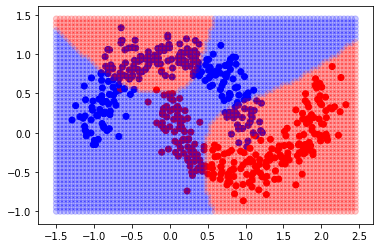

In [25]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0) #알파 = 투명도
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

## activation 변경해보기. LeakyReLu
->층이 많아져도 ok

In [319]:
model3 = Sequential([
    Dense(5, activation=LeakyReLU(alpha=0.1), input_dim=2),   
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid'),
])

model3.summary()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_267 (Dense)            (None, 5)                 15        
_________________________________________________________________
dense_268 (Dense)            (None, 10)                60        
_________________________________________________________________
dense_269 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_270 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_271 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_272 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_273 (Dense)            (None, 10)              

In [320]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.fit(x_data, y_data, batch_size=100, 
           epochs=3000, verbose=0, 
           validation_data=(x_data,y_data),
           callbacks=[printepoch(500)])

0 => {'val_loss': 0.6923365235328675, 'val_accuracy': 0.5, 'loss': 0.693143117427826, 'accuracy': 0.436}
500 => {'val_loss': 0.006508723096339963, 'val_accuracy': 0.9980000257492065, 'loss': 0.006777781574055552, 'accuracy': 0.998}
1000 => {'val_loss': 0.0356955386698246, 'val_accuracy': 0.9879999756813049, 'loss': 0.00947833915706724, 'accuracy': 0.996}
1500 => {'val_loss': 5.082533243694343e-05, 'val_accuracy': 1.0, 'loss': 5.105035438646155e-05, 'accuracy': 1.0}
2000 => {'val_loss': 5.406401646723679e-06, 'val_accuracy': 1.0, 'loss': 5.434921899905021e-06, 'accuracy': 1.0}
2500 => {'val_loss': 8.588010302901239e-07, 'val_accuracy': 1.0, 'loss': 8.649026710827456e-07, 'accuracy': 1.0}
